In [25]:
import tensorflow as tf

In [26]:
!pip install transformers==4.39
import transformers
print(transformers.__version__)

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


ERROR: Could not find a version that satisfies the requirement transformers==4.39 (from versions: none)
ERROR: No matching distribution found for transformers==4.39


NameError: name '_C' is not defined

In [27]:
!pip install keras==2.15.0
import keras
print(keras.__version__)

ERROR: Could not find a version that satisfies the requirement keras==2.15.0 (from versions: none)
ERROR: No matching distribution found for keras==2.15.0
3.0.5


In [28]:
import pandas as pd
jokes_data = pd.read_csv("/kaggle/input/jokes-question-and-answer/qajokes1.1.2.csv")

In [29]:
from sklearn.model_selection import train_test_split


jokes_data['formatted'] = jokes_data['Question'] + " " + jokes_data['Answer']
# Drop rows where the 'formatted' column has null values
jokes_data = jokes_data.dropna(subset=['formatted'])
jokes_data = jokes_data.reset_index(drop=True)

In [30]:
# Split the data into training and validation sets
train_texts, val_texts, _, _ = train_test_split(jokes_data['formatted'], jokes_data['formatted'], test_size=0.1, random_state=19)
test_texts = val_texts[-3:].to_list()
test_questions = [joke.split('?')[0] + '?' for joke in test_texts]
val_texts = val_texts[:-3]

In [31]:
test_questions

['What is a ducks favorite snack?',
 'How does the chef prepare the chicken?',
 "Why don't Pirates get invited to Birthday parties?"]

In [32]:
test_texts

['What is a ducks favorite snack? Quackers.',
 'How does the chef prepare the chicken? The waiter replies, "He looks it straight in the eye and says, \'You\'re gonna die.\'"',
 "Why don't Pirates get invited to Birthday parties? Because they always steal doubloons"]

In [33]:
from transformers import GPT2Tokenizer

tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

# Set the pad token to EOS token
tokenizer.pad_token = tokenizer.eos_token

# Now you can safely tokenize the texts with padding
# try to map tokenizer back to the word space to see if there's any problem
# use the same tokenizer but map the other way around
train_encodings = tokenizer(train_texts.tolist(), truncation=True, padding=True, max_length=64)
val_encodings = tokenizer(val_texts.tolist(), truncation=True, padding=True, max_length=64)

NameError: name '_C' is not defined

In [34]:
# Convert the 2D lists of input_ids into tensors
train_input_ids = tf.convert_to_tensor(train_encodings['input_ids'])
val_input_ids = tf.convert_to_tensor(val_encodings['input_ids'])

# Shift input ids one token to the right to create the labels.
# search
def shift_tokens_right(input_ids):
    zero_pad = tf.zeros((input_ids.shape[0], 1), dtype=tf.int32)
    shifted_input_ids = tf.concat([input_ids[:, 1:], zero_pad], axis=1)
    return shifted_input_ids

# Create the labels by shifting the input_ids
train_labels = shift_tokens_right(train_input_ids)
val_labels = shift_tokens_right(val_input_ids)

NameError: name 'train_encodings' is not defined

In [37]:
# Preparing datasets with the correct inputs and labels
train_dataset = tf.data.Dataset.from_tensor_slices(({"input_ids": train_input_ids, "attention_mask": tf.convert_to_tensor(train_encodings['attention_mask'])}, train_labels))
val_dataset = tf.data.Dataset.from_tensor_slices(({"input_ids": val_input_ids, "attention_mask": tf.convert_to_tensor(val_encodings['attention_mask'])}, val_labels))

# Configure the datasets for performance
train_dataset = train_dataset.shuffle(len(train_input_ids)).batch(8, drop_remainder=True)
val_dataset = val_dataset.batch(8, drop_remainder=True)

NameError: name 'train_input_ids' is not defined

In [38]:
from transformers import TFGPT2LMHeadModel

model = TFGPT2LMHeadModel.from_pretrained('gpt2', pad_token_id=tokenizer.eos_token_id)

NameError: name '_C' is not defined

In [39]:
MAX_LENGTH_GENERATED_TEXT = 200

def generate_joke(question, model=model, tokenizer=tokenizer, max_length=MAX_LENGTH_GENERATED_TEXT):
    input_ids = tokenizer.encode("Q: " + question + " A:", return_tensors='tf')
    max_length = input_ids.shape[1] + MAX_LENGTH_GENERATED_TEXT
    output = model.generate(
        input_ids, max_length=max_length, num_return_sequences=1, 
        pad_token_id=tokenizer.eos_token_id, eos_token_id=tokenizer.eos_token_id,
        no_repeat_ngram_size=2)
    return tokenizer.decode(output[0], skip_special_tokens=True)

NameError: name 'model' is not defined

In [40]:
print(generate_joke(test_questions[0], max_length=100))

NameError: name 'generate_joke' is not defined

In [41]:
print(generate_joke(test_questions[0], max_length=200))

NameError: name 'generate_joke' is not defined

In [42]:
print(generate_joke(test_questions[1]))
print(generate_joke(test_questions[2]))

NameError: name 'generate_joke' is not defined

In [43]:
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# play with the temperature

model.compile(optimizer=optimizer, loss=[loss, *[None] * model.config.n_layer])

NameError: name 'model' is not defined

In [44]:
# Define the checkpoint path and filenames
checkpoint_filepath = '/kaggle/working/best_model.keras'

# Create a ModelCheckpoint callback that saves the model's weights only
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_loss',  # or another metric such as 'val_accuracy'
    mode='min',          # 'min' if the monitored metric should decrease (e.g., loss)
    save_best_only=True, # Only save a model if `val_loss` has improved
    verbose=1            # Log a message whenever a new checkpoint is saved
)

In [45]:
# model.fit(train_dataset, validation_data=val_dataset, epochs=3, callbacks=[model_checkpoint_callback])

In [46]:
model.save('/kaggle/working/full_model.keras')

NameError: name 'model' is not defined

In [47]:
print(generate_joke(test_questions[0], model=model))
print(generate_joke(test_questions[1], model=model))
print(generate_joke(test_questions[2], model=model))

NameError: name 'generate_joke' is not defined

In [48]:
import pandas as pd # read the csv
import re # regex to detect username, url, html entity 
import nltk # to use word tokenize (split the sentence into words)
import tensorflow as tf
from nltk.corpus import stopwords # to remove the stopwords
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional

from keras.utils import to_categorical
from keras import backend as K

In [49]:
data = pd.read_csv("/kaggle/input/hate-speech-and-offensive-language-detection/train.csv")
data

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...
24778,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,6,0,6,0,1,youu got wild bitches tellin you lies


In [50]:
(data
     .groupby("class")
     .agg(
        hate_speech_count=("hate_speech_count", "mean"),
        offensive_language_count=("offensive_language_count", "mean"),
        neither_count=("neither_count", "mean"),
     )
     .round(1)
)

,hate_speech_count,offensive_language_count,neither_count
class,,,
0,2.3,0.8,0.1
1,0.2,3.0,0.1
2,0.1,0.3,2.8


In [51]:
# merge class 0 and 1 to classify it as offensive hate speech
data = (data
    .assign(
        class_=data["class"].map({
            0:1,
            1:1,
            2:0
        })
    )
    .drop(columns=["class"])
    .rename(columns={"class_": "class"})
)

data["class"].value_counts(dropna=False, normalize=True).sort_index()

class
0    0.167978
1    0.832022
Name: proportion, dtype: float64

In [52]:
class_map = {
    0: "neutral", 
    1: "offensive and hate speech"
}

In [53]:
tweet = list(data['tweet'])
labels = list(data['class'])

Clean Data

In [54]:
tweet

["!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...",
 '!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!',
 '!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit',
 '!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny',
 '!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;',
 '!!!!!!!!!!!!!!!!!!"@T_Madison_x: The shit just blows me..claim you so faithful and down for somebody but still fucking with hoes! &#128514;&#128514;&#128514;"',
 '!!!!!!"@__BrighterDays: I can not just sit up and HATE on another bitch .. I got too much shit going on!"',
 "!!!!&#8220;@selfiequeenbri: cause I'm tired of you big bitches coming for us skinny girls!!&#8221;",
 '" &amp; you might not get ya bitch back &amp; thats t

In [55]:
nltk.download('punkt')

stop_words = set(stopwords.words('english'))
# add rt to remove retweet in dataset (noise)
stop_words.add("RT")

# remove html entity:
def remove_entity(raw_text):
    entity_regex = r"&[^\s;]+;"
    text = re.sub(entity_regex, "", raw_text)
    return text

# change the user tags
def change_user(raw_text):
    regex = r"@([^ ]+)"
    text = re.sub(regex, "", raw_text)

    return text

# remove urls
def remove_url(raw_text):
    url_regex = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"
    text = re.sub(url_regex, '', raw_text)

    return text

# remove unnecessary symbols
def remove_noise_symbols(raw_text):
    text = raw_text.replace('"', '')
    text = text.replace("'", '')
    text = text.replace("!", '')
    text = text.replace("`", '')
    text = text.replace("..", '')
    # text = text.replace("RT", '')
    # text = text.replace("user", '')

    return text

# remove stopwords
def remove_stopwords(raw_text):
    tokenize = nltk.word_tokenize(raw_text)
    text = [word for word in tokenize if not word.lower() in stop_words]
    text = " ".join(text)

    return text

## this function in to clean all the dataset by utilizing all the function above
def preprocess(datas):
    clean = []
    # remove the @xxx 
    clean = [change_user(text) for text in datas]
    # remove emojis (specifically unicode emojis)
    clean = [remove_entity(text) for text in clean]
    # remove urls
    clean = [remove_url(text) for text in clean]
    # remove trailing stuff
    clean = [remove_noise_symbols(text) for text in clean]
    # remove stopwords
    clean = [remove_stopwords(text) for text in clean]

    return clean

[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


In [56]:
# call the cleaning function
clean_tweet = preprocess(tweet)
clean_tweet

['RT woman shouldnt complain cleaning house . man always take trash .',
 'RT boy dats cold.tyga dwn bad cuffin dat hoe 1st place',
 'RT Dawg RT ever fuck bitch start cry ? confused shit',
 'RT look like tranny',
 'RT shit hear might true might faker bitch told ya',
 'shit blows meclaim faithful somebody still fucking hoes',
 'sit HATE another bitch got much shit going',
 'cause Im tired big bitches coming us skinny girls',
 'might get ya bitch back thats',
 ': hobbies include : fighting Mariam bitch',
 'Keeks bitch curves everyone lol walked conversation like . Smh',
 'Murda Gang bitch Gang Land',
 'hoes smoke losers ? yea . go IG',
 'bad bitches thing like',
 'bitch get',
 'bitch nigga miss',
 'bitch plz whatever',
 'bitch love',
 'bitches get cut everyday B',
 'black bottle bad bitch',
 'broke bitch cant tell nothing',
 'cancel bitch like Nino',
 'cant see hoes wont change',
 'fuck bitch dont even suck dick Kermit videos bout fuck IG',
 'got ya bitch tip toeing hardwood floors',
 'pu

Split data into train and test

Epoch 1/20
310/310 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.8809 - loss: 0.0341 - val_accuracy: 0.9439 - val_loss: 0.0157
Epoch 2/20
310/310 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.9704 - loss: 0.0087 - val_accuracy: 0.9445 - val_loss: 0.0186
Epoch 3/20
310/310 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9844 - loss: 0.0052 - val_accuracy: 0.9419 - val_loss: 0.0229
Epoch 4/20
310/310 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9918 - loss: 0.0032 - val_accuracy: 0.9391 - val_loss: 0.0297
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9401 - loss: 0.0307
Test Loss: 0.029827283695340157
Test Accuracy: 0.9390760660171509


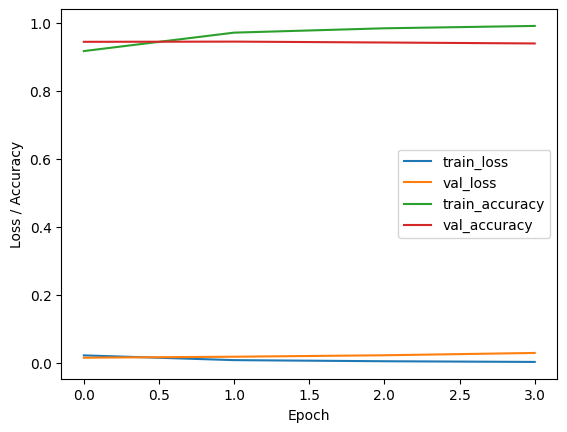

In [59]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras import losses
from tensorflow.keras.losses import BinaryFocalCrossentropy


# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_tweet)
X_tokenized = tokenizer.texts_to_sequences(clean_tweet)

# Pad the tokenized sequences to make them all the same length
max_length = 15  # Define your desired maximum sequence length
X_padded = pad_sequences(X_tokenized, maxlen=max_length)

# Convert the target labels to arrays
y_array = np.array(labels)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y_array, test_size=0.2, random_state=42)

# Create the model
modelTD = Sequential()
modelTD.add(Embedding(len(tokenizer.word_index) + 1, 64))
modelTD.add(Bidirectional(LSTM(32, dropout=0.3, recurrent_dropout=0.3)))
modelTD.add(Dense(16, activation="relu"))
modelTD.add(Dense(1, activation="sigmoid"))

# Configure the BinaryFocalCrossentropy loss with class balancing
loss_function = BinaryFocalCrossentropy(gamma=2, apply_class_balancing=True)

# Compile the model with the custom loss function
modelTD.compile(optimizer='adam', loss=loss_function, metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model
modelTD_history = modelTD.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=20,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

# Evaluate the model on the test set
test_loss, test_accuracy = modelTD.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Plot training history
plt.plot(modelTD_history.history['loss'], label='train_loss')
plt.plot(modelTD_history.history['val_loss'], label='val_loss')
plt.plot(modelTD_history.history['accuracy'], label='train_accuracy')
plt.plot(modelTD_history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.show()

In [61]:
# Define the test inputs
test1 = "@CNN The weather forecast predicts sunshine and clear skies for tomorrow."
test2 = "I enjoy reading books and spending time in nature #selflove."
test3 = "i love you"
test4 = "I can't stand those immigrants ruining our country fuck them!!!"
test5 = "@melanie You damn broke bitch you should die LOL"

# Put the test inputs into a list
docs = [test1, test2, test3, test4, test5]

# Tokenize the test inputs
docs_processed = tokenizer.texts_to_sequences(docs)

# Pad the tokenized sequences
docs_processed = pad_sequences(docs_processed, maxlen=max_length, padding="post", truncating="post")

# Make predictions
y_pred = modelTD.predict(docs_processed)

# Threshold for classification
threshold = 0.5

# Define labels
class_map = {0: "Not Hate Speech", 1: "Hate Speech"}

print("\nHate speech and offensive language detection algorithm.")
print("Model prediction:")
for doc, pred in zip(docs, y_pred):
    label = 1 if pred >= threshold else 0
    print(f"{doc: <75} : predicted as {class_map[label]} with confidence {pred[0]:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step

Hate speech and offensive language detection algorithm.
Model prediction:
@CNN The weather forecast predicts sunshine and clear skies for tomorrow.   : predicted as Not Hate Speech with confidence 0.2352
I enjoy reading books and spending time in nature #selflove.                : predicted as Not Hate Speech with confidence 0.3934
i love you                                                                  : predicted as Not Hate Speech with confidence 0.3421
I can't stand those immigrants ruining our country fuck them!!!             : predicted as Hate Speech with confidence 0.7239
@melanie You damn broke bitch you should die LOL                            : predicted as Hate Speech with confidence 0.8033
